In [1]:
import os
import femder as fd
import numpy as np

Default Plotly renderer: notebook


In [4]:
path_to_geo = os.path.join(".", "assets", "geo_drago_dividido__pepejone.brep")

# alterar conforme as medições feitas na sala
temperatura = 18.6 + 273.15
umidade = 76.0
pressao_atm = 100900.0
ind_adiab = 1.4
R_ar = 287.031    # J/mol.k
AP = fd.AirProperties(c0=np.sqrt(ind_adiab * R_ar * temperatura), temperature=18.6, humid=umidade, p_atm=pressao_atm)
fmax = 200  # Fmax é a nossa frequência de schroeder
fmin = 20
AC = fd.AlgControls(AP, freq_init = fmin, freq_end = fmax, freq_step = 1)

lala <femder.controlsair.AirProperties object at 0x7fab2b6a9130>


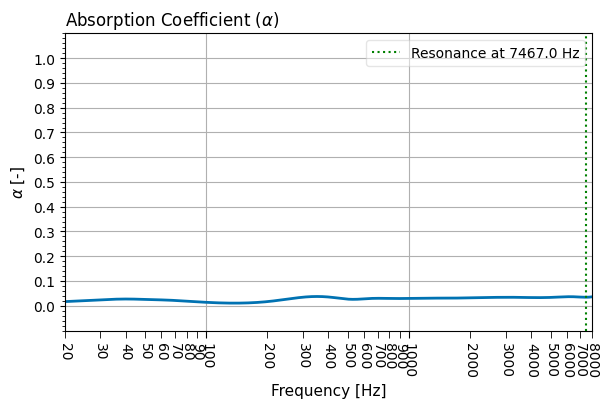

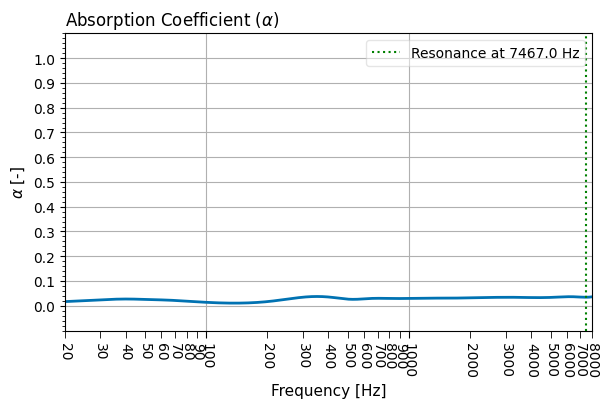

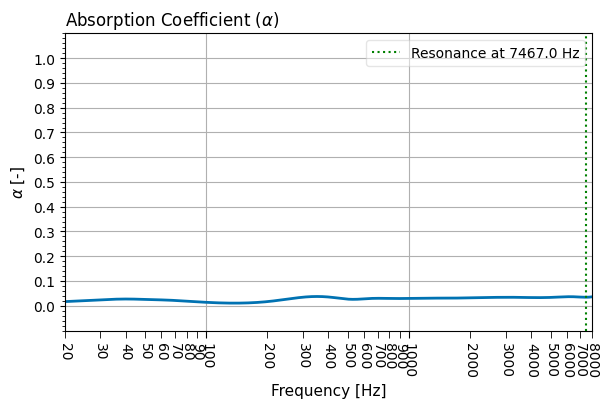

In [6]:
S = fd.Source("spherical")
# S.coord = np.array([[-1,2.25,1.2],[1,2.25,1.2]])
S.coord = np.array([[0.1, 0.1, 0.1]])  # coordenada da fonte na sala
S.q = np.array([0.008])  # velocidade de volume da fonte

R = fd.Receiver()  # Receptores
# Respectivamente temos o mic 1, mic 2 e mic 3
R.coord = np.array([[0.2, 0.2, 0.2]])
# cada vetor é um receptor seguindo x, y, z

tmm_paredes = fd.TMM(fmin=20, fmax=8000, df=1, incidence='normal')
tmm_paredes.material_model(type="plaster", params=None)
tmm_paredes.compute(rigid_backing=True, conj=False, show_layers=True)
tmm_paredes.plot(figsize=(7,5), plots=['alpha'], saveFig=False, timestamp=False, filename='parede_lab')

tmm_chao = fd.TMM(fmin=20, fmax=8000, df=1, incidence='normal')
tmm_chao.material_model(type="plaster", params=None)
tmm_chao.compute(rigid_backing=True, conj=False, show_layers=True)
tmm_chao.plot(figsize=(7,5), plots=['alpha'], saveFig=False, timestamp=False, filename='chao_lab')

tmm_teto = fd.TMM(fmin=20, fmax=8000, df=1, incidence='normal')
tmm_teto.material_model(type="plaster", params=None)
tmm_teto.compute(rigid_backing=True, conj=False, show_layers=True)
tmm_teto.plot(figsize=(7,5), plots=['alpha'], saveFig=False, timestamp=False, filename='teto_lab')

BC = fd.BC(AC, AP)
BC.TMM(2, tmm_paredes)
BC.TMM(3, tmm_paredes)
BC.TMM(4, tmm_paredes)
BC.TMM(5, tmm_paredes)
BC.TMM(6, tmm_chao)
BC.TMM(7, tmm_teto)

In [4]:
grid = fd.GridImport3D(AP, path_to_geo, S, R, fmax=fmax, num_freq=6, scale=1, order=1, load_method='meshio')
obj_sem_tratamento = fd.FEM3D(grid, S, R, AP, AC, BC)

NameError: name 'AP' is not defined

In [5]:
obj_sem_tratamento.plot_problem(renderer=None, surface_opacity= 0.4)

NameError: name 'obj_sem_tratamento' is not defined

In [ ]:
obj_sem_tratamento.compute()